In [1]:
import numpy
import os
import string

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
})

In [4]:
import sys
sys.path.append("../scripts/")
import pp_vis

In [5]:
qual_colormap = plt.get_cmap("tab10")
plat_order=["OpenMP", "Kokkos", "CUDA", "OpenACC", "OpenCL"]
csv_root="../data/"

In [6]:
class LegendHelper(matplotlib.legend_handler.HandlerBase):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize,
                       trans):
        a = []
        names = None
        if plat_names == None:
            name = orig_handle.get_label()
        else:
            name = plat_names[orig_handle.get_label()]
        tmp = plat_colors[name]
        face = (tmp[0], tmp[1], tmp[2], 0.5)
        rect = mpatches.Rectangle([xdescent, ydescent-height/2], width, height*2, facecolor=face, #plat_colors[orig_handle.get_label()],                                 
                                edgecolor='black', lw=1,
                                transform=trans)
        a.append(rect)
        txt = matplotlib.text.Text(xdescent + width*0.5, ydescent+height*0.4,
                                   plat_labels[name],
                                   ha='center', va='center', c='black', fontsize=fontsize, fontfamily='sans-serif', zorder=4)
        a.append(txt)
        return a

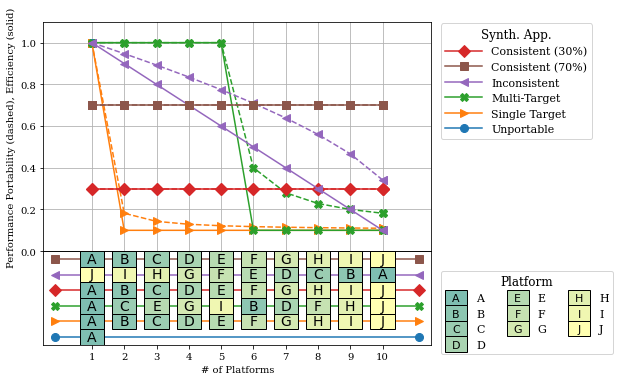

In [9]:
effs_df = pp_vis.app_effs(os.path.join(csv_root, "synthetic.csv"), raw_effs=True)

app_order = ['Unportable',
             'Single Target',
             'Multi-Target',
             'Consistent (30%)',
             'Consistent (70%)',
             'Inconsistent']

app_markers = dict([(n, m) for n,m in zip(app_order, ['o','>', 'X', 'D', 's', '<'])])

fig = plt.figure(figsize=(6, 5))
plat_colors = {}
plat_handles = []
synth_plats=effs_df[effs_df.columns[0]]
plat_labels= dict(zip(synth_plats, synth_plats))
plat_names = None
plat_cmap = plt.get_cmap("summer")
for i, p in enumerate(synth_plats):
    plat_colors[p] = plat_cmap(float(i)/(len(synth_plats)-1))
    plat_handles.append(mpatches.Patch(color=plat_colors[p], label=p))

handles = {}
gs = fig.add_gridspec(1,1)
index = [0, 0]
 
pp_vis.plot_cascade(fig, gs, index, effs_df, handles, app_colors=None, plat_colors=plat_colors, plat_labels=plat_labels, app_markers=app_markers)

#handle_names = sorted(list(handles.keys()), key=lambda x: app_order.index(" ".join(x.split()[:-1])))
handle_names = sorted(list(handles.keys()))
handle_lists = [handles[a] for a in handle_names]
fig.legend(handle_lists, handle_names, loc='upper left' , bbox_to_anchor=(1.0,1.0),handlelength=3.4, ncol=1, fontsize=11, title_fontsize=12, title="Synth. App.")
fig.legend(handles=plat_handles, loc='lower left', bbox_to_anchor=(1.0,0.05),handler_map={mpatches.Patch : LegendHelper()},handlelength=2.0, ncol=3,  fontsize=11, title_fontsize=12, title="Platform")
plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.0)
    
plt.savefig(f"synthetic_cascade.png", dpi = 300 ,bbox_inches="tight")

In [10]:
gpu_handles = []
cpu_handles = []
gpus=['K20', 'P100','V100','Turing','Radeon VII', 'Ampere']
cpus=['Skylake', 'KNL', 'Power 9', "Naples", "ThunderX2", 'NEC Aurora']
gpu_cmap = plt.get_cmap("summer")
cpu_cmap = plt.get_cmap("cool")
        
plat_names = {}
for i, p in enumerate(gpus):
    plat_colors[p] = gpu_cmap(float(i)/(len(gpus)-1))
    gpu_handles.append(mpatches.Patch(color=plat_colors[p], label="GPU %d" % i))
    plat_names["GPU %d" % i] = p
for i, p in enumerate(cpus):
    plat_colors[p] = cpu_cmap(float(i)/(len(cpus)-1))
    cpu_handles.append(mpatches.Patch(color=plat_colors[p], label="CPU %d" % i))
    plat_names["CPU %d" % i] = p
print(plat_names)

{'GPU 0': 'K20', 'GPU 1': 'P100', 'GPU 2': 'V100', 'GPU 3': 'Turing', 'GPU 4': 'Radeon VII', 'GPU 5': 'Ampere', 'CPU 0': 'Skylake', 'CPU 1': 'KNL', 'CPU 2': 'Power 9', 'CPU 3': 'Naples', 'CPU 4': 'ThunderX2', 'CPU 5': 'NEC Aurora'}


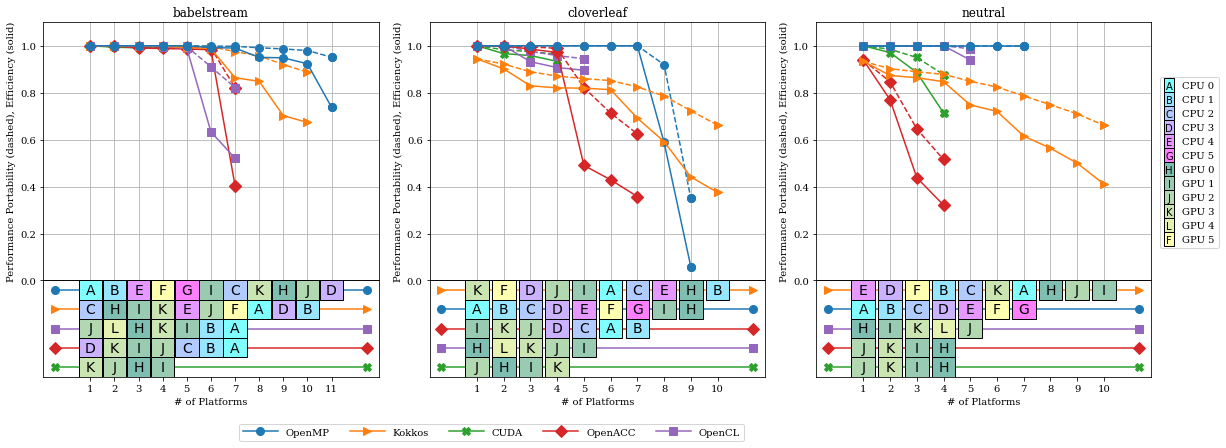

In [13]:
fig = plt.figure(figsize=(16, 6.5))
app_order = ["OpenMP", "Kokkos", "CUDA", "OpenACC", "OpenCL"]
app_markers = dict([(n, m) for n,m in zip(app_order, ['o','>', 'X', 'D', 's', '<'])])

# Ensure applications use the same color across all three plots
qual_colormap = plt.get_cmap("tab10")
app_colors = {}
for i, name in enumerate(app_order):
  app_colors[name] = qual_colormap(i)

handles = {}
gs = fig.add_gridspec(1,3)
for i, appfile in enumerate(["babelstream.csv", "cloverleaf.csv", "neutral.csv"]):

    col = i-3*(i//3)
    row = i//3 
    index = [row, col]
    
    throughput=(appfile == "babelstream.csv")
    integrate=False
    appname=None
    effs_df = pp_vis.app_effs(os.path.join(csv_root, appfile), raw_effs=False, throughput=throughput)
    plats = effs_df[effs_df.columns[0]]
    plat_labels=dict(zip(plats, string.ascii_uppercase))
    
    appname = os.path.splitext(os.path.basename(appfile))[0]
    ax=pp_vis.plot_cascade(fig, gs, index, effs_df, handles, app_colors=app_colors, plat_colors=plat_colors, plat_labels=plat_labels, app_markers=app_markers) 
    ax.set_title(appname)
#handle_names, handle_lists = zip(*handles.items())
handle_names = app_order
handle_lists = [handles[a] for a in handle_names]
fig.legend(handle_lists, handle_names, loc='upper left', bbox_to_anchor=(0.20,0.11),handlelength=3.5, ncol=5)
fig.legend(handles=cpu_handles+gpu_handles, loc='upper left', bbox_to_anchor=(1.0,0.85), handler_map={mpatches.Patch : LegendHelper()}, handlelength=1.0)

plt.tight_layout(pad=0.4,w_pad=1.5, h_pad=1.0)
plt.subplots_adjust(bottom=0.2)    
plt.savefig(f"app_platforms_cascade.png", dpi=300, bbox_inches="tight")